# Kaggle Dataset

In [59]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [60]:
df= pd.read_csv("combined_dataset.csv")
df.drop(columns=['ranking','isIp','valid'])


,domain,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...
95905,www.freewebs.com/ryanrules2/,8035,28,0,0,0,16,2,0
95906,www.ireland-information.com/freecelticfonts.htm,8400,47,0,0,1,27,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,0,43,0,0,0,29,3,1
95908,www.askmen.com/sports/business/index.html,9862,41,0,0,0,14,2,0


<AxesSubplot: >

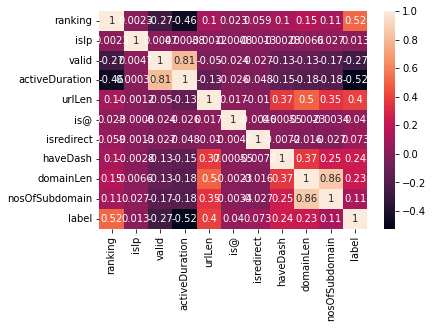

In [61]:
sns.heatmap(df.corr(),annot=True)

In [62]:
df_bad= df.where(df['label']==0).dropna()
df_good= df.where(df['label']==1).dropna()

In [63]:
df_bad.drop(columns=['ranking','isIp','valid'])
df_bad

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914.0,0.0,1.0,7305.0,42.0,0.0,0.0,0.0,12.0,2.0,0.0
3,bima.astro.umd.edu/nemo/linuxastro/,7001.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,18.0,3.0,0.0
6,www.synchrotech.com/support/install.html,10000000.0,0.0,1.0,12053.0,40.0,0.0,0.0,0.0,19.0,2.0,0.0
7,www.ansi.okstate.edu/breeds/swine/largeblackwh...,23191.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,20.0,3.0,0.0
8,www.strum.co.uk/webbery/,10000000.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,15.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95902,www.angelfire.com/tx4/PolkLonghorns/,2547.0,0.0,1.0,8035.0,36.0,0.0,0.0,0.0,17.0,2.0,0.0
95903,www.freewebs.com/aylesburyscrabble/index.htm,5001.0,0.0,1.0,8035.0,44.0,0.0,0.0,0.0,16.0,2.0,0.0
95905,www.freewebs.com/ryanrules2/,5001.0,0.0,1.0,8035.0,28.0,0.0,0.0,0.0,16.0,2.0,0.0
95906,www.ireland-information.com/freecelticfonts.htm,230251.0,0.0,1.0,8400.0,47.0,0.0,0.0,1.0,27.0,2.0,0.0


In [64]:
df_good.drop(columns=['ranking','isIp','valid'])
df_good

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000.0,0.0,0.0,0.0,20.0,0.0,0.0,1.0,20.0,2.0,1.0
2,tecportais.com/file-security-update-infonfmati...,10000000.0,0.0,0.0,0.0,155.0,0.0,0.0,0.0,14.0,1.0,1.0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000.0,0.0,1.0,730.0,79.0,0.0,0.0,1.0,14.0,1.0,1.0
5,diannaopeizhi.com/js/,10000000.0,0.0,1.0,1096.0,21.0,0.0,0.0,0.0,17.0,1.0,1.0
11,expertwear.pk/img/glyph/1/beveilings/online/in...,10000000.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95898,cdqzyc.com/js/?us.battle.net/login/en/?ref=htt...,10000000.0,0.0,1.0,7670.0,108.0,0.0,0.0,0.0,10.0,1.0,1.0
95900,pastehtml.com/view/b2i243gkw.html,44061.0,0.0,1.0,4017.0,33.0,0.0,0.0,0.0,13.0,1.0,1.0
95904,payless4rx.net/abn-amro/identification/,10000000.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,14.0,1.0,1.0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,29.0,3.0,1.0


In [65]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_bad.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000
mean,3163651.34903,0.00000,0.72987,6206.19347,36.63134,0.00030,0.00000,0.05456,16.43947,2.10104,0.00000
std,4581849.37379,0.00000,0.44403,4093.98620,13.72282,0.01732,0.00000,0.22711,4.00063,0.54955,0.00000
min,1.00000,0.00000,0.00000,0.00000,10.00000,0.00000,0.00000,0.00000,5.00000,1.00000,0.00000
25%,6655.00000,0.00000,0.00000,0.00000,27.00000,0.00000,0.00000,0.00000,14.00000,2.00000,0.00000
50%,50115.00000,0.00000,1.00000,8035.00000,33.00000,0.00000,0.00000,0.00000,16.00000,2.00000,0.00000
75%,10000000.00000,0.00000,1.00000,9133.00000,42.00000,0.00000,0.00000,0.00000,19.00000,2.00000,0.00000
max,10000000.00000,0.00000,1.00000,15707.00000,209.00000,1.00000,0.00000,1.00000,50.00000,6.00000,0.00000


In [66]:
df_good.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000
mean,8232344.22492,0.00039,0.46232,1989.41029,92.71538,0.00454,0.01277,0.23175,28.39450,2.59279,1.00000
std,3791179.17174,0.01983,0.49858,2773.68186,83.04449,0.06725,0.11228,0.42195,32.21723,2.74699,0.00000
min,1.00000,0.00000,0.00000,0.00000,9.00000,0.00000,0.00000,0.00000,3.00000,0.00000,1.00000
25%,10000000.00000,0.00000,0.00000,0.00000,39.00000,0.00000,0.00000,0.00000,14.00000,1.00000,1.00000
50%,10000000.00000,0.00000,0.00000,0.00000,67.00000,0.00000,0.00000,0.00000,19.00000,2.00000,1.00000
75%,10000000.00000,0.00000,1.00000,4017.00000,108.00000,0.00000,0.00000,0.00000,27.00000,2.00000,1.00000
max,10000000.00000,1.00000,1.00000,12231.00000,2175.00000,1.00000,1.00000,1.00000,244.00000,34.00000,1.00000


In [67]:
ndf = df.drop(columns=['domain'])

In [68]:
ndf

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,10000000,0,0,0,20,0,0,1,20,2,1
1,194914,0,1,7305,42,0,0,0,12,2,0
2,10000000,0,0,0,155,0,0,0,14,1,1
3,7001,0,0,0,35,0,0,0,18,3,0
4,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95905,5001,0,1,8035,28,0,0,0,16,2,0
95906,230251,0,1,8400,47,0,0,1,27,2,0
95907,10000000,0,0,0,43,0,0,0,29,3,1
95908,2008,0,1,9862,41,0,0,0,14,2,0


In [69]:
x=ndf.drop(columns=['ranking','isIp','valid'])
x

,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,0,20,0,0,1,20,2,1
1,7305,42,0,0,0,12,2,0
2,0,155,0,0,0,14,1,1
3,0,35,0,0,0,18,3,0
4,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...
95905,8035,28,0,0,0,16,2,0
95906,8400,47,0,0,1,27,2,0
95907,0,43,0,0,0,29,3,1
95908,9862,41,0,0,0,14,2,0


Accuracy of moedl: Logistic Regression 0.8331248045042227
Feature: activeDuration, Score: -0.00036
Feature: urlLen, Score: 0.04343
Feature: is@, Score: 0.00466
Feature: isredirect, Score: 0.02399
Feature: haveDash, Score: 0.10669
Feature: domainLen, Score: 0.13975
Feature: nosOfSubdomain, Score: -1.29896


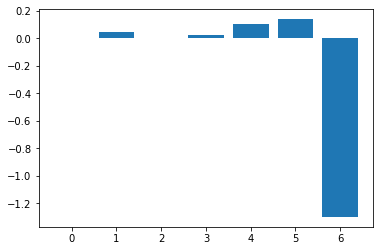

In [70]:
y= ndf['label']
x=ndf.drop(columns=['label','ranking','isIp','valid'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=42)
classifier = LogisticRegression(random_state=0)
classifier.fit(x, y)
predictions = classifier.predict(X_test)
print("Accuracy of moedl: Logistic Regression = ",accuracy_score(y_test, predictions))

#feature importance
importance = classifier.coef_[0]
col_list = list(x.columns)
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (col_list[i],v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
  
#testing model on mini-batches (10-100)
i=0
index=10
acc_list=[]
count=0
while(True):
	x = X_train[:index]
	y = y_train[:index]
	classifier = LogisticRegression(random_state=0)
	classifier.fit(x, y)
	predictions = classifier.predict(X_test)
	acc=accuracy_score(y_test, predictions)
	acc_list.append(acc)
	count+=1
	if count > 100:
		break
	i+=1
	index+=10


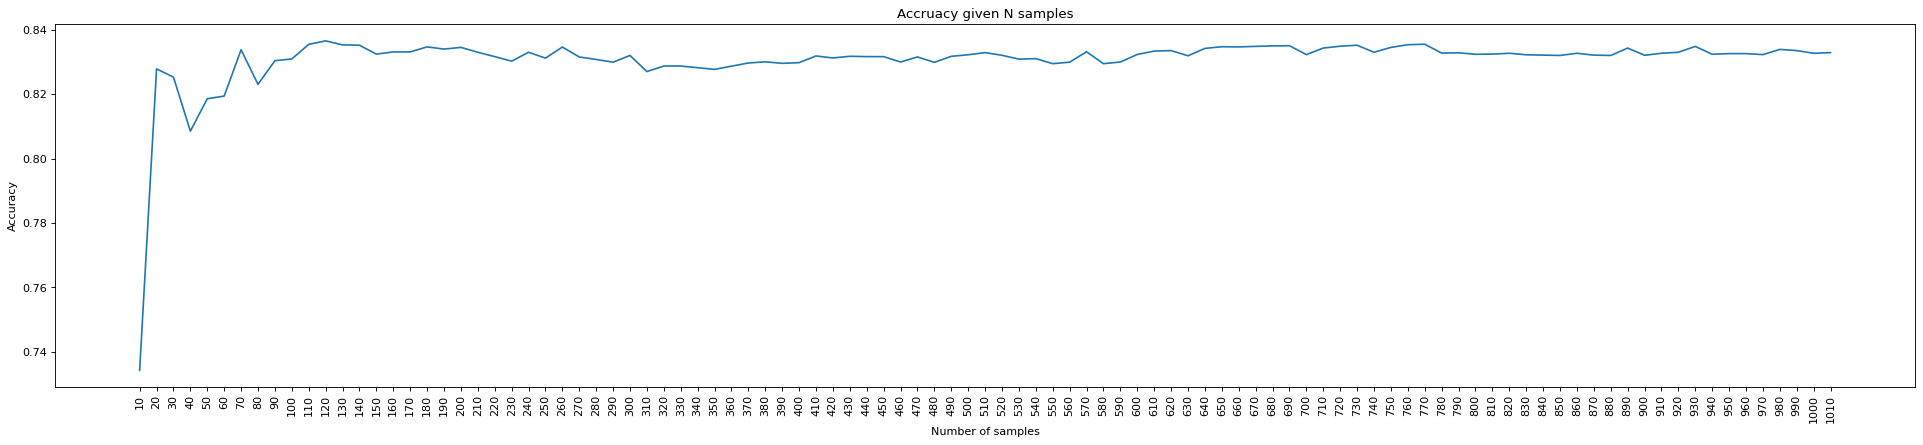

In [71]:
figure(figsize=(30, 6), dpi=80)
x= [i*10 for i in range(1,len(acc_list)+1)]
y= acc_list
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 10.0),rotation=90)
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.title('Accruacy given N samples')
plt.show()

# ISCXURL2016 Dataset

In [72]:
df1 = pd.read_csv("All.csv")

In [73]:
df1

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.50000,14,4.40000,4,8,3,0,...,1,0,-1,0.72630,0.78449,0.89489,0.85061,NaN,-1.00000,Defacement
1,0,4,5,5.50000,14,6.00000,4,12,4,0,...,0,0,-1,0.68863,0.78449,0.81472,0.85979,0.00000,-1.00000,Defacement
2,0,4,5,5.50000,14,5.80000,4,12,5,0,...,0,0,-1,0.69505,0.78449,0.81472,0.80188,0.00000,-1.00000,Defacement
3,0,4,12,5.50000,14,5.50000,4,32,16,0,...,0,0,-1,0.64013,0.78449,0.81472,0.66321,0.00000,-1.00000,Defacement
4,0,4,6,5.50000,14,7.33333,4,18,11,0,...,0,0,-1,0.68131,0.78449,0.81472,0.80453,0.00000,-1.00000,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.75000,12,3.66667,4,20,24,3,...,3,2,7,0.69055,0.79127,0.77750,0.69023,0.65668,0.79621,spam
36703,0,4,13,3.75000,8,8.46154,4,24,23,0,...,16,15,-1,0.66549,0.82001,0.87959,0.67440,0.67467,-1.00000,spam
36704,58,3,27,6.66667,16,3.37500,3,41,34,20,...,8,7,9,0.65681,0.80114,0.68478,0.71362,0.71719,0.70524,spam
36705,35,3,13,4.33333,9,3.60000,3,15,13,7,...,9,8,3,0.72596,0.89762,0.87105,0.74593,0.75882,0.79077,spam


In [74]:
set(df1['URL_Type_obf_Type'])

{'Defacement', 'benign', 'malware', 'phishing', 'spam'}

In [75]:
labels = ['phishing', 'spam']
ndf1 = df1.loc[df1['URL_Type_obf_Type'].isin(labels)]
ndf1['URL_Type_obf_Type'] = ndf1['URL_Type_obf_Type'].map({'phishing':1,'spam':2})
ndf1.dropna(inplace=True)

In [76]:
ndf1

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
22423,166,3,31,3.66667,5,2.00000,3,57,44,7,...,-1,-1,-1,0.60013,0.87527,-1.00000,-1.00000,-1.00000,-1.00000,1
22424,153,3,19,5.00000,10,5.40000,3,47,48,34,...,5,4,3,0.61531,0.80558,0.68865,0.57931,0.57287,0.56222,1
22426,0,3,11,8.00000,18,6.90000,3,56,34,34,...,2,1,0,0.70654,0.80763,0.66078,0.70520,0.68786,0.68039,1
22427,0,3,11,8.00000,18,6.90000,3,43,29,34,...,2,1,0,0.70838,0.80763,0.66078,0.70832,0.69117,0.68380,1
22429,0,3,9,7.33333,16,9.00000,3,47,38,33,...,2,1,0,0.69355,0.80453,0.61356,0.70550,0.68818,0.68072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.75000,12,3.66667,4,20,24,3,...,3,2,7,0.69055,0.79127,0.77750,0.69023,0.65668,0.79621,2
36703,0,4,13,3.75000,8,8.46154,4,24,23,0,...,16,15,-1,0.66549,0.82001,0.87959,0.67440,0.67467,-1.00000,2
36704,58,3,27,6.66667,16,3.37500,3,41,34,20,...,8,7,9,0.65681,0.80114,0.68478,0.71362,0.71719,0.70524,2
36705,35,3,13,4.33333,9,3.60000,3,15,13,7,...,9,8,3,0.72596,0.89762,0.87105,0.74593,0.75882,0.79077,2


In [77]:
y= ndf1['URL_Type_obf_Type']
x=ndf1.drop(columns=['URL_Type_obf_Type'])
X_train, X_test, y_train, y_test = train_test_split(x,y)
classifier = LogisticRegression(random_state=0)
classifier.fit(x, y)
predictions = classifier.predict(X_test)
print("Accuracy of model: Logistic Regression = ",accuracy_score(y_test, predictions))

Accuracy of model: Logistic Regression 0.9457032920051304


In [78]:
#feature importance
importance = classifier.coef_[0]
col_list = list(x.columns)
collist=[]
vallist=[]
for i,v in enumerate(importance):
	collist.append(col_list[i])
	vallist.append(v)
featureDf= pd.DataFrame(data = [collist,vallist]).T
featureDf


,0,1
0,Querylength,-0.14591
1,domain_token_count,0.50943
2,path_token_count,0.39003
3,avgdomaintokenlen,-1.27569
4,longdomaintokenlen,0.73526
...,...,...
74,Entropy_Domain,-0.04254
75,Entropy_DirectoryName,0.01390
76,Entropy_Filename,-0.01341
77,Entropy_Extension,0.11284


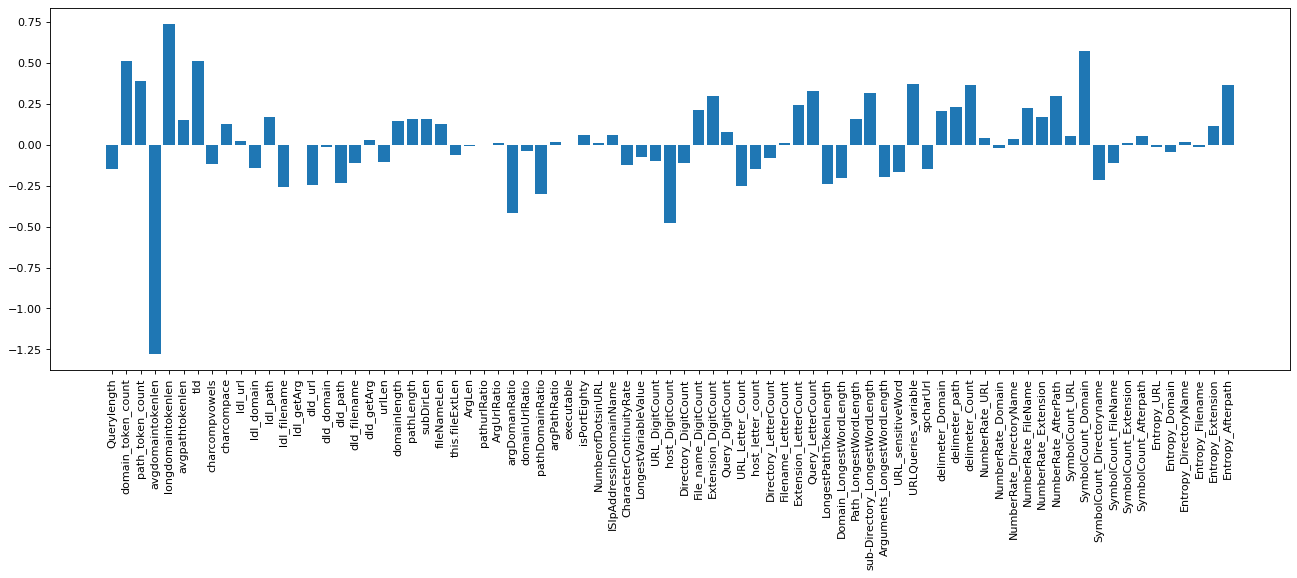

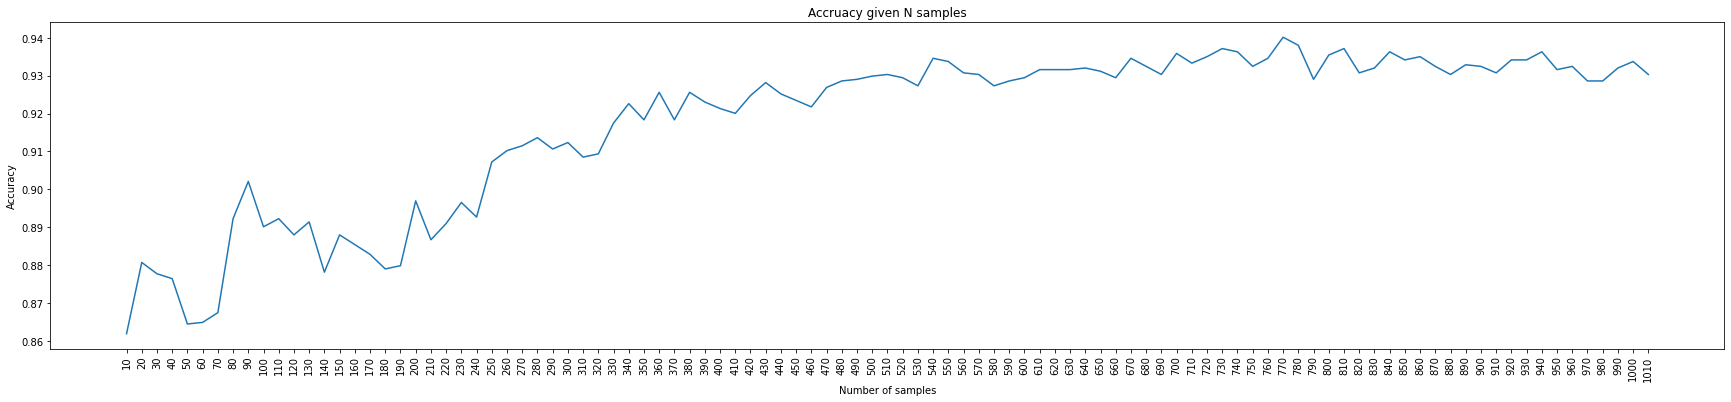

In [80]:
#plot feature importance
figure(figsize=(20, 6), dpi=80)
plt.bar(collist, importance)
plt.xticks(rotation=90)
plt.show()
  
#testing model on mini-batches (10-100)
i=0
index=10
acc_list=[]
count=0
while(True):
	x = X_train[:index]
	y = y_train[:index]
	classifier = LogisticRegression(random_state=0)
	classifier.fit(x, y)
	predictions = classifier.predict(X_test)
	acc=accuracy_score(y_test, predictions)
	acc_list.append(acc)
	count+=1
	if count > 100:
		break
	i+=1
	index+=10
	
figure(figsize=(30, 6))
x= [i*10 for i in range(1,len(acc_list)+1)]

y= acc_list

plt.plot(x,y)

plt.xticks(np.arange(min(x), max(x)+1, 10.0),rotation=90)
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.title('Accruacy given N samples')
plt.show()